<a href="https://colab.research.google.com/github/albertomariapepe/Learning-Rotations/blob/main/Inverse_Kinematics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Dataset (AFS, AMC Files)

In [ ]:
!pip install -qq transforms3d

     |████████████████████████████████| 62 kB 1.5 MB/s 


In [ ]:
import os, sys
!git clone -q https://github.com/CalciferZh/AMCParser

In [ ]:
sys.path.append('AMCParser')
import amc_parser as amc

In [ ]:
%matplotlib inline
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
from google.colab import drive
drive.mount('/content/AMCParser/drive/')

ValueError: ignored

In [ ]:
BASE_DIR = Path('AMCParser/drive/MyDrive/')
datasets_df = pd.DataFrame({'path': list(BASE_DIR.glob('subjects/*/*.amc'))})
datasets_df['Subject'] = datasets_df['path'].map(lambda x: x.parent.stem)
datasets_df['Activity'] = datasets_df['path'].map(lambda x: x.stem.split('_')[-1].lower())
datasets_df['asf_path'] = datasets_df['path'].map(lambda x: x.parent / (x.parent.stem + '.asf'))

datasets_df.sample(3)

In [ ]:
datasets_df[['Subject', 'Activity']].describe()

In [ ]:
joints = amc.parse_asf(test_rec['asf_path'])
motions = amc.parse_amc(test_rec['path'])

In [ ]:
frame_idx = np.random.choice(range(len(motions)))
joints['root'].set_motion(motions[frame_idx])
joints['root'].draw()

In [ ]:
def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict
motion_df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions])
motion_df.to_csv('motion.csv', index=False)
motion_df.sample(3)

In [ ]:
# #2514 is the number of subjects

def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict

i = 0

while i < 875:
    index = np.random.choice(range(2514))
    test_rec = datasets_df.iloc[index]
    #print('processing Subject n. ', int(test_rec.Subject), '/143, Activity n. ', int(test_rec.Activity))

    joints = amc.parse_asf(test_rec['asf_path'])
    motions = amc.parse_amc(test_rec['path'])

    motion_df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions])
    motion_df.to_csv('/content/MOTIONS/motion_' + str(test_rec.Subject) + '_' + str(test_rec.Activity)+'.csv', index=False)
    print('motion_' + str(test_rec.Subject) + '_' + str(test_rec.Activity)+'.csv...DONE!')
    #print('**********')
    print(i, '/875')
    print('**********')
    i = i + 1


In [ ]:
!zip -r /content/MOTIONS.zip /content/MOTIONS/
from google.colab import files
files.download("/content/MOTIONS.zip")

In [ ]:
#GET T-POSE

for i in range(0, 2514):
    test_rec = datasets_df.iloc[i]
    if int(test_rec.Subject) == 87 and int(test_rec.Activity) == 2:   #87_02 IS THE T-POSE IN THE MOCAP DATASET
        print(i)
        print('processing Subject n. ', int(test_rec.Subject), '/143, Activity n. ', int(test_rec.Activity))
    
def get_joint_pos_dict(c_joints, c_motion):
    c_joints['root'].set_motion(c_motion)
    out_dict = {}
    for k1, v1 in c_joints['root'].to_dict().items():
        for k2, v2 in zip('xyz', v1.coordinate[:, 0]):
            out_dict['{}_{}'.format(k1, k2)] = v2
    return out_dict

test_rec = datasets_df.iloc[i]
#print('processing Subject n. ', int(test_rec.Subject), '/143, Activity n. ', int(test_rec.Activity))

joints = amc.parse_asf(test_rec['asf_path'])
motions = amc.parse_amc(test_rec['path'])

motion_df = pd.DataFrame([get_joint_pos_dict(joints, c_motion) for c_motion in motions])
motion_df.to_csv('motion_T_pose.csv', index=False)
print('motion_' + str(test_rec.Subject) + '_' + str(test_rec.Activity)+'.csv...DONE!')

# Compute Rotations 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[0.98303656 0.18033652 0.03343437]
[0.0, 0.0, 0.0]
[0.98303656 0.18033652 0.03343437]
---
[ 0.24192556  0.64247854 -0.72711303]
[2.4757581519689116, 0.4541739697037315, 0.08420380463470423]
[ 2.71768371  1.09665251 -0.64290922]
---
[ 0.24192556  0.64247854 -0.72711303]
[4.067021574325167, 4.68007142114128, -4.698376329821464]
[ 4.30894713  5.32254996 -5.42548936]
---
[ 0.95604969  0.1891551  -0.22402977]
[5.989406189346831, 9.785323091712266, -10.476149099192895]
[  6.94545588   9.97447819 -10.70017887]
---
[ 0.98183972 -0.1312729   0.13696056]
[8.201122269843033, 10.222912664366023, -10.994417407032422]
[  9.18296199  10.09163977 -10.85745684]
---
[-0.49946739 -0.68290565  0.53307804]
[9.339418146013918, 10.070721430808353, -10.835632177176002]
[  8.83995076   9.38781578 -10.30255414]
---
[ 0.4187559  -0.89194587 -0.17051703]
[0.0, 0.0, 0.0]
[ 0.4187559  -0.89194587 -0.17051703]
---
[-0.46050333 -0.8876573   0.00109534]
[3.758765768770004, -7.341112441017847, -0.3142274066005477]
[ 3.

"\nRs = []\n\n#for i in range(0, joint_n*3, 3):\nfor i in range(0, joint_n):\n\n    a = [T[i, 0], T[i,1], T[i,2]]\n    b = [M[i, 0], M[i,1], M[i,2]]\n\n    #a = a / np.linalg.norm(a)\n    #b = b / np.linalg.norm(b)\n\n    C = np.cross(a, b)\n    D = np.dot(a, b)\n\n    s = np.linalg.norm(C)\n\n    if C[0] != 0 or C[1] != 0 or C[2] != 0:\n        Z = [[0 , -C[2],  C[1]], [C[2],  0 , -C[0]],[-C[1], C[0], 0]]\n        C0 = C / np.linalg.norm(C)\n        R = (np.eye(3) + Z + np.matmul(Z,Z) * ((1 - D)/(s**2)))/(np.linalg.norm(a))\n\n    else:\n        print('collinear points!')\n        R = np.sign(D) * ( np.linalg.norm(b)/ np.linalg.norm(a)) * np.eye(3)\n    \n    #R = R/np.linalg.norm(R)\n    Rs = np.append(Rs, R)\n\n\nRs = np.reshape(Rs, [joint_n, 3, 3])\n\nxs_p = []\nys_p = []\nzs_p = []\n\n#for i in range(0, 3*joint_n, 3):\nfor i in range(0, joint_n):\n    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]\n    a = [T[i, 0], T[i,1], T[i,2]]\n    #R = Rs[int(np.floor(i/3)), :, :]

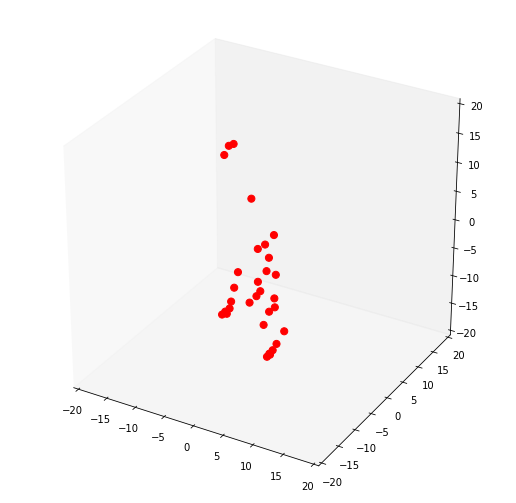

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []

fig=plt.figure(1, figsize=(9,9))
ax = fig.gca(projection='3d')

joint_n = 31


T = []

for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#ax.scatter(T[:,2], T[:,0], T[:,1], c = 'k', alpha = 1, s = 50);
ax.grid(False)


#reading the rotated pose
#dir = 'MyDrive/MOTIONS/'
#for filename in os.listdir(dir):
data = pd.read_csv('motion_05_06.csv')

data = data.iloc[147,:]


xs = []
ys = []
yz = []

fig=plt.figure(1, figsize=(7,7))
ax = fig.gca(projection='3d')

joint_n = 31


M = []

for i in range(0, 3*joint_n, 3):
    a  = [data.iloc[i], data.iloc[i+1], data.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    M = np.append(M, a)

M = np.reshape(M, [31, 3])
M = M - M[0]

ax.scatter(M[:,2], M[:,0], M[:,1], c = 'r', alpha = 1, s = 50);

#ax.scatter(M[14:18,2], M[14:18,0], M[14:18,1], c = 'k', alpha = 1);
#ax.plot(M[0:6, 2], M[0:6, 0], M[0:6, 1], c = 'm', alpha = 1)
#ax.plot(M[7:13, 2], M[7:13, 0], M[7:13, 1], c = 'k', alpha = 1)

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

#ax.set_xlim([-1, 1])
#ax.set_ylim([-1, 1])
#ax.set_zlim([-1, 1])


Rs = []

for i in range(0, joint_n):

    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]
        b = [M[i+1, 0] - M[i,0], M[i+1,1]-M[i,1], M[i+1,2] - M[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
        b = [M[i, 0] - M[0,0], M[i,1]-M[0,1], M[i+1,2] - M[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
        b = [M[i, 0] - M[14,0], M[i,1]-M[14,1], M[i,2] - M[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]
        b = [M[i, 0] - M[21,0], M[i,1]-M[21,1], M[i,2] - M[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        b = [M[i, 0] - M[28,0], M[i,1]-M[28,1], M[i,2] - M[28,2]]
    
    
    #print(a)
    #print(b)
    #b = [M[i+1, 0] - M[i,0], M[i+1,1]-M[i,1], M[i+1,2] - M[i,2]]

    a = a / np.linalg.norm(a)
    b = b / np.linalg.norm(b)

    C = np.cross(a, b)
    D = np.dot(a, b)

    s = np.linalg.norm(C)

    if C[0] != 0 or C[1] != 0 or C[2] != 0:
        Z = [[0 , -C[2],  C[1]], [C[2],  0 , -C[0]],[-C[1], C[0], 0]]
        C0 = C / np.linalg.norm(C)
        R = (np.eye(3) + Z + np.matmul(Z,Z) * ((1 - D)/(s**2)))/(np.linalg.norm(a))

    else:
        print('collinear points!')
        R = np.sign(D) * ( np.linalg.norm(b)/ np.linalg.norm(a)) * np.eye(3)
    
    #R = R/np.linalg.norm(R)
    Rs = np.append(Rs, R)

Rs = np.reshape(Rs, [joint_n, 3, 3])

xs_p = []
ys_p = []
zs_p = []

#for i in range(0, 3*joint_n, 3):
for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

    R = Rs[i, :, :]
    a = a / np.linalg.norm(a)

    off = [M[i,0], M[i,1], M[i,2]]

    if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
    if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
    if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
    if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    
    b_prime = np.matmul(R, a)
    print(b_prime)
    print(off)
    b_prime = b_prime + off
    print(b_prime)
    print('---')
    xs_p = np.append(xs_p, b_prime[0])
    ys_p = np.append(ys_p, b_prime[1])
    zs_p = np.append(zs_p, b_prime[2])

#ax.scatter(zs_p, xs_p, ys_p, c = 'g', alpha = 1);



#####ABSOLUTE ROTATIONS###########
'''
Rs = []

#for i in range(0, joint_n*3, 3):
for i in range(0, joint_n):

    a = [T[i, 0], T[i,1], T[i,2]]
    b = [M[i, 0], M[i,1], M[i,2]]

    #a = a / np.linalg.norm(a)
    #b = b / np.linalg.norm(b)

    C = np.cross(a, b)
    D = np.dot(a, b)

    s = np.linalg.norm(C)

    if C[0] != 0 or C[1] != 0 or C[2] != 0:
        Z = [[0 , -C[2],  C[1]], [C[2],  0 , -C[0]],[-C[1], C[0], 0]]
        C0 = C / np.linalg.norm(C)
        R = (np.eye(3) + Z + np.matmul(Z,Z) * ((1 - D)/(s**2)))/(np.linalg.norm(a))

    else:
        print('collinear points!')
        R = np.sign(D) * ( np.linalg.norm(b)/ np.linalg.norm(a)) * np.eye(3)
    
    #R = R/np.linalg.norm(R)
    Rs = np.append(Rs, R)


Rs = np.reshape(Rs, [joint_n, 3, 3])

xs_p = []
ys_p = []
zs_p = []

#for i in range(0, 3*joint_n, 3):
for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    a = [T[i, 0], T[i,1], T[i,2]]
    #R = Rs[int(np.floor(i/3)), :, :]
    R = Rs[i, :, :]
    a = a / np.linalg.norm(a)

    b_prime = np.matmul(R, a)
    b_prime = b_prime
    xs_p = np.append(xs_p, b_prime[0])
    ys_p = np.append(ys_p, b_prime[1])
    zs_p = np.append(zs_p, b_prime[2])

ax.scatter(zs_p, xs_p, ys_p, c = 'g', alpha = 1);
'''



In [ ]:
np.matmul(Rs[1], np.transpose(Rs[1]))

In [ ]:
M[i]

In [ ]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

joint_n = 31

data = pd.read_csv('motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []
T = []

for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#np.save('data/motion_T_pose.csv', T)


%cd ..
%cd content

dir = 'drive/MyDrive/MOTIONS/'
cnt = 0
for filename in os.listdir(dir):
    print(filename)
    cnt = cnt + 1
    print('processing file number:', cnt, '/749')
    data_or = pd.read_csv(dir + filename)

    frame_n, _ = np.shape(data_or.iloc[:,:])

    Rf = []
    for k in range(0, frame_n):
        data = data_or.iloc[k,:]
        
        xs = []
        ys = []
        zs = []
        
        
        M = []
        for i in range(0, 3*joint_n, 3):
            a  = [data.iloc[i], data.iloc[i+1], data.iloc[i+2]]
            xs = np.append(xs, a[0])
            ys = np.append(ys, a[1])
            zs = np.append(zs, a[2])
            M = np.append(M, a)

        M = np.reshape(M, [31, 3])
        M = M - M[0]

        Rs = []

        for i in range(0, joint_n):
            
            if i != 30:
                a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]
                b = [M[i+1, 0] - M[i,0], M[i+1,1]-M[i,1], M[i+1,2] - M[i,2]]

            if i == 6 or i == 11:
                a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
                b = [M[i, 0] - M[0,0], M[i,1]-M[0,1], M[i+1,2] - M[0,2]]
    
            if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
                a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
                b = [M[i, 0] - M[14,0], M[i,1]-M[14,1], M[i,2] - M[14,2]]
    
            if i == 23: #l-thumb connected to l-finger base (index = 21)
                a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]
                b = [M[i, 0] - M[21,0], M[i,1]-M[21,1], M[i,2] - M[21,2]]

            if i == 30: #r-thumb connected to r-finger base (index = 28)
                a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
                b = [M[i, 0] - M[28,0], M[i,1]-M[28,1], M[i,2] - M[28,2]]


            a = a / np.linalg.norm(a)
            b = b / np.linalg.norm(b)

            C = np.cross(a, b)
            D = np.dot(a, b)

            s = np.linalg.norm(C)

            if C[0] != 0 or C[1] != 0 or C[2] != 0:
                Z = [[0 , -C[2],  C[1]], [C[2],  0 , -C[0]],[-C[1], C[0], 0]]
                C0 = C / np.linalg.norm(C)
                R = (np.eye(3) + Z + np.matmul(Z,Z) * ((1 - D)/(s**2)))/(np.linalg.norm(a))

            elif np.linalg.norm(b) == 0 and np.linalg.norm(a) == 0:
                R = np.eye(3)
            else:
                print('collinear points!')
                R = np.sign(D) * ( np.linalg.norm(b)/ np.linalg.norm(a)) * np.eye(3)
        
    
    
        
            Rs = np.append(Rs, R)
        Rs = np.reshape(Rs, [joint_n, 3, 3])
        Rf = np.append(Rf, Rs)
    Rf = np.reshape(Rf, [frame_n, joint_n, 3, 3])
    if filename != 'motion_T_pose.csv':
        np.save('data/' +filename , Rf)
        print('data/' +filename + ' ..... saved!')
        print('****')


In [ ]:
!zip -r /content/ROTATIONS-NEW.zip /content/data/
from google.colab import files
#files.download("/content/ROTATIONS-NEW.zip")

In [ ]:
import shutil
#shutil.move("/content/ROTATIONS-NEW.zip", "/content/drive/MyDrive") 
shutil.move("/content/ROTATIONS-NEW", "/content/drive/MyDrive") 

'/content/drive/MyDrive/ROTATIONS-NEW'

# Data Preparation

In [ ]:
!pip install git+https://github.com/pygae/clifford.git@master
!pip install tensorflow_graphics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..
%cd content

/
/content


In [ ]:
import os
import pandas as pd
import numpy as np

dir_mot = 'drive/MyDrive/MOTIONS/'
dir_rot = 'drive/MyDrive/ROTATIONS-NEW/'
cnt = 0
joint_n = 31

positions = []
rotations = []
names = []

for filename in os.listdir(dir_mot):
    cnt = cnt + 1
    print('processing file ', filename, ', number:', cnt, '/760')
    if filename[-6] != '1':
        motion = pd.read_csv(dir_mot + filename)
        rotation = np.load(dir_rot + filename + '.npy')

    frame_n, _ = np.shape(motion.iloc[:,:])

    Rf = []
    for k in range(0, frame_n):
        data = motion.iloc[k,:]
        names = np.append(names, filename + '_' + str(k))
        '''
        #print(filename + '_' + str(k))
        M = []
        for i in range(0, 3*joint_n, 3):
            a  = [data.iloc[i], data.iloc[i+1], data.iloc[i+2]]
            M = np.append(M, a)

        M = np.reshape(M, [31, 3])
        M = M - M[0]
        Rf = np.append(Rf, M)

    
    Rf = np.reshape(Rf, [frame_n, joint_n, 3])
    
    positions = np.append(positions, Rf)
    rotations = np.append(rotations, rotation)
    '''
    print(filename, '...done!')
    print('****')


np.save('positions-new' , positions)
np.save('rotations-new' , rotations)





processing file  motion_01_07.csv , number: 1 /760
motion_01_07.csv ...done!
****
processing file  motion_141_25.csv , number: 2 /760
motion_141_25.csv ...done!
****
processing file  motion_89_06.csv , number: 3 /760
motion_89_06.csv ...done!
****
processing file  motion_90_12.csv , number: 4 /760
motion_90_12.csv ...done!
****
processing file  motion_118_18.csv , number: 5 /760
motion_118_18.csv ...done!
****
processing file  motion_63_23.csv , number: 6 /760
motion_63_23.csv ...done!
****
processing file  motion_84_02.csv , number: 7 /760
motion_84_02.csv ...done!
****
processing file  motion_91_06.csv , number: 8 /760
motion_91_06.csv ...done!
****
processing file  motion_83_63.csv , number: 9 /760
motion_83_63.csv ...done!
****
processing file  motion_132_50.csv , number: 10 /760
motion_132_50.csv ...done!
****
processing file  motion_78_29.csv , number: 11 /760
motion_78_29.csv ...done!
****
processing file  motion_126_06.csv , number: 12 /760
motion_126_06.csv ...done!
****
proce

KeyboardInterrupt: ignored

In [ ]:
#np.save('positions-new' , positions)
#np.save('rotations-new' , rotations)
with open('listfile.txt', 'w') as filehandle:
    for listitem in names:
        filehandle.write('%s\n' % listitem)

In [ ]:
import shutil
#shutil.move("/content/positions-new.npy", "/content/drive/MyDrive") 
#shutil.move("/content/rotations-new.npy", "/content/drive/MyDrive")
shutil.move("/content/listfile.txt", "/content/drive/MyDrive")

np.shape(names)

(742041,)

In [ ]:
import os
import pandas as pd
import numpy as np

dir_mot = 'drive/MyDrive/MOTIONS/'
dir_rot = 'drive/MyDrive/ROTATIONS/'
cnt = 0
joint_n = 31

for filename in os.listdir(dir_mot):
    cnt = cnt + 1
    print(cnt, '/ 760')
    if filename[-6] != '1' and filename[-6] != 'motion_T_pose.csv':
        motion = pd.read_csv(dir_mot + filename)
        frame_n, _ = np.shape(motion.iloc[:,:])
        for k in range(0, frame_n):
            names_ref = np.append(names_ref, filename + '-' + str(k))

with open("names.txt", "w") as output:
    output.write(str(names_ref))

In [ ]:
cnt = 0
with open("names.txt", "w") as output:
    while cnt < 375040:
        output.write(str(names_ref[cnt]))
        output.write('\n')
        cnt = cnt + 1
        print(cnt)

# Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..
%cd content

/
/content


In [ ]:
!pip install git+https://github.com/pygae/clifford.git@master
!pip install tensorflow_graphics

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from clifford.g3c import *
from clifford.tools.g3c import *
from clifford.tools.g3c.rotor_parameterisation import *
from keras.layers import BatchNormalization, Lambda, Flatten, Dropout, Conv1D, Concatenate
from keras.layers import Conv2D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPool1D, GlobalMaxPool2D, MaxPooling2D, Input, Dense, concatenate
from keras import backend as K
from sklearn.model_selection import train_test_split
from math import acos, sqrt
import tensorflow as tf
from matplotlib import pyplot as plt
import keras
from math import e, pi
import tensorflow_graphics as tfg
import tensorflow_graphics.geometry.transformation as tfg_transformation
from sklearn.utils import shuffle
from keras.utils.vis_utils import plot_model
import random

In [ ]:
x = np.load('drive/MyDrive/positions-new.npy')
y = np.load('drive/MyDrive/rotations-new.npy')

In [ ]:
size = 1194159
x_pos = np.reshape(x, [size, 31, 3])
y_rot = np.reshape(y, [size, 31, 9])

random.seed(0)
x_pos, y_rot = shuffle(x_pos, y_rot)

x_pos = x_pos[0:10000, : , :]
y_rot = y_rot[0:10000, : , :]

out_size = 9

In [ ]:
y_rot = np.nan_to_num(y_rot, copy=False, nan=0.0, posinf=0.0, neginf=0.0)
x_pos = np.nan_to_num(x_pos, copy=False, nan=0.0, posinf=0.0, neginf=0.0)

In [ ]:
#ROTOR CASE
tot = 10000

b = []
for i in range(0,tot):
  print(i)
  for j in range(0, 31):
    matrix = np.reshape(y_rot[i, j], [3, 3])

    #express the rotation matrix as a quaternion / euler angle / axis angle
    Q = R.from_matrix(matrix)
    #B = Q.as_euler('xyz')
    #B = Q.as_rotvec()
    Q = Q.as_quat()

    #rotor from quaternion
    Rot = Q[0] + Q[2]*e13 +Q[1]*e23 + Q[3]*e12

    #Rot = up(Q[0] + Q[2]*e13 +Q[1]*e23 + Q[3]*e12)

    #bivector as exponential
    B = -2*general_logarithm(Rot)

    #bivector as Cayley
    #B = (1 - Rot)/(1 + Rot)

    b = np.append(b, [B[6], B[7], B[10]])
  

y_rot = []
y_rot = b
y_rot = np.reshape(y_rot, [tot, 31, 3])
out_size = 3

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.


Streaming output truncated to the last 5000 lines.
5000
5001
5002
5003
5004
5005
5006
5007
5008
5009
5010
5011
5012
5013
5014
5015
5016
5017
5018
5019
5020
5021
5022
5023
5024
5025
5026
5027
5028
5029
5030
5031
5032
5033
5034
5035
5036
5037
5038
5039
5040
5041
5042
5043
5044
5045
5046
5047
5048
5049
5050
5051
5052
5053
5054
5055
5056
5057
5058
5059
5060
5061
5062
5063
5064
5065
5066
5067
5068
5069
5070
5071
5072
5073
5074
5075
5076
5077
5078
5079
5080
5081
5082
5083
5084
5085
5086
5087
5088
5089
5090
5091
5092
5093
5094
5095
5096
5097
5098
5099
5100
5101
5102
5103
5104
5105
5106
5107
5108
5109
5110
5111
5112
5113
5114
5115
5116
5117
5118
5119
5120
5121
5122
5123
5124
5125
5126
5127
5128
5129
5130
5131
5132
5133
5134
5135
5136
5137
5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189

In [ ]:
#QUATERNION, EULER, ROTVEC CASE
tot = 10000
out_size = 3

b = []
for i in range(0,tot):
  print(i)
  for j in range(0, 31):
    matrix = np.reshape(y_rot[i, j], [3, 3])

    #express the rotation matrix as a quaternion / euler angle / axis angle
    Q = R.from_matrix(matrix)
    #Q = Q.as_euler('xyz')
    Q = Q.as_rotvec()
    #Q = Q.as_quat()

    #b = np.append(b, [Q[0], Q[1], Q[2], Q[3]])
    b = np.append(b, [Q[0], Q[1], Q[2]])
  

y_rot = []
y_rot = b
y_rot = np.reshape(y_rot, [tot, 31, out_size])

In [ ]:
inp = Input(shape=(31, 3)) 
x = Dense(1024)(inp)
x = keras.layers.LeakyReLU()(x)
x = Dense(1024)(x)
x = keras.layers.LeakyReLU()(x)
x = Dense(1024)(x)
x = keras.layers.LeakyReLU()(x)
x = Dense(1024)(x)
x = keras.layers.LeakyReLU()(x)
x = Dense(out_size)(x)
out = keras.layers.LeakyReLU()(x)

MLP = keras.Model(inputs=inp, outputs=out)
#plot_model(MLP, show_shapes=True, show_dtype=True)
    

In [ ]:
MLP.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 31, 3)]           0         
_________________________________________________________________
dense (Dense)                (None, 31, 1024)          4096      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 31, 1024)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 31, 1024)          1049600   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 31, 1024)          0         
_________________________________________________________________
dense_2 (Dense)              (None, 31, 1024)          1049600   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 31, 1024)          0     

In [ ]:
def loss(y_true, y_pred):
  l2 = K.mean((y_true - y_pred)**2)
  return l2

Epoch 1/100
74/74 [==============================] - 2s 30ms/step - loss: 2.4378 - val_loss: 2.1525
Epoch 2/100
74/74 [==============================] - 2s 24ms/step - loss: 2.1636 - val_loss: 2.1173
Epoch 3/100
74/74 [==============================] - 2s 24ms/step - loss: 2.1042 - val_loss: 2.0230
Epoch 4/100
74/74 [==============================] - 2s 28ms/step - loss: 1.9879 - val_loss: 1.9128
Epoch 5/100
74/74 [==============================] - 2s 24ms/step - loss: 1.9415 - val_loss: 1.8905
Epoch 6/100
74/74 [==============================] - 2s 24ms/step - loss: 1.9097 - val_loss: 1.8726
Epoch 7/100
74/74 [==============================] - 2s 28ms/step - loss: 1.8918 - val_loss: 1.8722
Epoch 8/100
74/74 [==============================] - 2s 28ms/step - loss: 1.8840 - val_loss: 1.8517
Epoch 9/100
74/74 [==============================] - 2s 29ms/step - loss: 1.8662 - val_loss: 1.8426
Epoch 10/100
74/74 [==============================] - 2s 24ms/step - loss: 1.8588 - val_loss: 1.8441

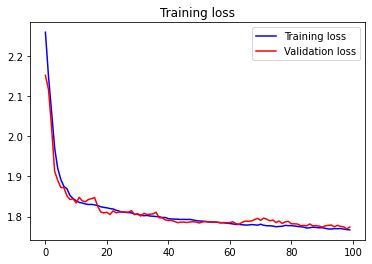

In [ ]:
nb_epoch =  100
batch_size = 64

import keras.backend as K


def custom_loss(y_true, y_pred):

    y_pred_n = tf.reshape(y_pred, [-1, 31, 3, 3])
    y_true_n = tf.reshape(y_true, [-1, 31, 3, 3])

    for i in range(0, 31):
        y_pred = y_pred_n[:, i, :, :]
        y_true = y_true_n[:, i, :, :]
        
        a1 = y_pred[:,:,0]
        a2 = y_pred[:,:,1]


        b1, _ = tf.linalg.normalize(a1, ord='euclidean')
        c = tf.tensordot(b1, a2, axes=[1, 1])
        c = a2 - tf.matmul(c, b1)
        b2, _ = tf.linalg.normalize(c, ord='euclidean')

        b3 = tf.linalg.cross(b1, b2)
        y_pred_rot = tf.concat([b1, b2, b3], axis = 1)

        y_pred_rot = tf.reshape(y_pred_rot, [-1, 3, 3])

        if i == 0:
            l2 = K.mean((y_true - y_pred_rot)**2)
        else:
            l2 = l2 + K.mean((y_true - y_pred_rot)**2)

    return l2


MLP.compile(loss = 'mse', optimizer = 'adam', run_eagerly=True)
 
x_train, x_test, y_train, y_test = train_test_split(x_pos, y_rot, test_size=0.33, random_state=42)

#s = 0.1
#noise = np.random.normal(0, s, x_train.shape)
#x_train = x_train + noise


es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=9)
model_train = MLP.fit(x = x_train, y = y_train, 
                        validation_split = 0.3,
                        epochs=nb_epoch,
                        verbose=1,
                        shuffle=False,
                        batch_size=batch_size)


loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(0,np.size(loss))
plt.figure()
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training loss')
plt.legend()
plt.show()

# Reconstruction (Geodesic Error)

In [ ]:
#ROTATION MATRIX

predicted = MLP.predict(x_test)
Langle = []

te_len = np.shape(y_test)[0]

for i in range(0,te_len):
    for j in range(0, 31):
        y_pred = np.reshape(predicted[i,j], [3, 3])
        y_real = np.reshape(y_test[i,j], [3, 3])


        M = np.matmul(y_real, np.linalg.inv(y_pred))
        #print(M)
        cosine = (M[0,0] + M[1,1] + M[2,2] - 1)/2

        if cosine > 1:
            cosine = 1
    
        if cosine < -1:
            cosine = -1
    
        #print(acos(cosine))
        Langle = np.append(Langle, acos(cosine))


print(np.max(Langle)*180/pi)
print(np.average(Langle)*180/pi)
print(np.std(Langle)*180/pi)


180.0
34.5510436004309
60.41928746160803


In [ ]:
#### 6D REPRESENTATION #####

predicted = MLP.predict(x_test)
Langle = []

te_len = np.shape(y_test)[0]

for i in range(0,te_len):
    for j in range(0, 31):
        y_pred = np.reshape(predicted[i,j], [3, 3])
        y_real = np.reshape(y_test[i,j], [3, 3])

        a1 = y_pred[:,0]
        a2 = y_pred[:,1]

        b1 = a1 / np.linalg.norm(a1)
        b2 = a2 - np.dot(a2,b1)*b1
        b2 = b2 / np.linalg.norm(b2)

        b3 = np.cross(b1, b2)

        #y_pred_n = np.transpose([b1, b2, b3])
        y_pred_n = np.reshape([b1, b2, b3], [3,3])
        M = np.matmul(y_real, np.linalg.inv(y_pred_n))
        #print(M)
        cosine = (M[0,0] + M[1,1] + M[2,2] - 1)/2

        if cosine > 1:
            cosine = 1
    
        if cosine < -1:
            cosine = -1
    
        #print(acos(cosine))
        Langle = np.append(Langle, acos(cosine))


print(np.max(Langle)*180/pi)
print(np.average(Langle)*180/pi)
print(np.std(Langle)*180/pi)

In [ ]:
#######PREDICTION FOR ROTOR AND BIVECTOR#######
predicted = MLP.predict(x_test)

Langle = []

te_len = np.shape(y_test)[0]


for i in range(0,5):
    print(predicted[0,i])
    print(y_test[0,i])

from math import acos

TEST = y_test

####BIVECTOR CASE#####
for i in range(0, te_len):
  for j in range(0, 31):
    B = predicted[i,j][0]*e12 + predicted[i,j][1]*e13 + predicted[i,j][2]*e23
    #print(B)
    #Cayley transform
    #Rot_pred = (1-B)/(1+B) 
    #Exponential
    Rot_pred = e**(-0.5*B)

    B = TEST[i,j][0]*e12 +TEST[i,j][1]*e13 + TEST[i,j][2]*e23
    #print(B)
    #Cayley transform
    #Rot_real = (1-B)/(1+B) 
    #Exponential
    Rot_real = e**(-0.5*B)

    #print(Rot_pred)
    #print(Rot_real)
    #print('---')
    
    cosine = (Rot_real*~Rot_pred)[0]
    
    if cosine > 1:
        cosine = 1
    if cosine < -1:
        cosine = -1
    Langle = np.append(Langle, acos(cosine))


print(np.max(Langle)*180/pi)
print(np.average(Langle)*180/pi)
print(np.std(Langle)*180/pi)

[ 1.6416553  -0.17320772 -0.18800424]
[ 1.36287977 -1.14517199  0.28011581]
[ 0.20909978 -0.09183088  0.02362465]
[ 2.51927143 -0.2340756  -0.2990374 ]
[-1.0472802  -0.22366676  0.18706426]
[2.42748804 1.04142892 0.37437725]
[ 1.0575603   0.24578327 -0.60904455]
[ 1.47877595 -2.45341584  0.22361373]
[ 1.0361823  -0.00108333 -0.632565  ]
[-0.88310786  2.51909214 -1.21089502]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.


174.03288967882608
58.82296817684513
29.083064262294933


In [ ]:
#QUATERNION, EULER ANGLE, AXIS ANGLE

predicted = MLP.predict(x_test)
Langle = []

te_len = np.shape(y_test)[0]

for i in range(0,te_len):
    for j in range(0, 31):
        y_pred = np.reshape(predicted[i,j], [3])
        y_real = np.reshape(y_test[i,j], [3])
        
        #Q = R.from_quat(y_pred)
        #Q = R.from_euler('xyz', y_pred)
        Q = R.from_rotvec(y_pred)
        #B = Q.as_rotvec()
        y_pred = Q.as_matrix()

        #Q = R.from_quat(y_real)
        #Q = R.from_euler('xyz', y_real)
        Q = R.from_rotvec(y_real)
        #B = Q.as_euler('xyz')
        #B = Q.as_rotvec()
        y_real = Q.as_matrix()

        M = np.matmul(y_real, np.linalg.inv(y_pred))
        #print(M)
        cosine = (M[0,0] + M[1,1] + M[2,2] - 1)/2

        if cosine > 1:
            cosine = 1
    
        if cosine < -1:
            cosine = -1
    
        #print(acos(cosine))
        Langle = np.append(Langle, acos(cosine))


print(np.max(Langle)*180/pi)
print(np.average(Langle)*180/pi)
print(np.std(Langle)*180/pi)


In [ ]:
np.shape(y_test)

In [ ]:
np.where(Langle == np.max(Langle))
np.where(Langle == np.min(Langle))

# Plotting






In [ ]:
###MATRIX
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

dir_mot = 'drive/MyDrive/MOTIONS/'
data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []

fig=plt.figure(1, figsize=(9,9))
ax = fig.gca(projection='3d')

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

joint_n = 31


T = []


for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#ax.scatter(T[:,2], T[:,0], T[:,1], c = 'k', alpha = 1 );

k = 3204

xs_or = []
ys_or = []
zs_or = []

xs_p = []
ys_p = []
zs_p = []


#for i in range(0, 3*joint_n, 3):
for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

    if np.linalg.norm(a) != 0:
      a = a / np.linalg.norm(a)

    #retrieving the corresponding position 

    M = np.reshape(x_test[k], [31, 3])

    off = [M[i,0], M[i,1], M[i,2]]

    if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
    if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
    if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
    if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    

    y_pred = np.reshape(predicted[k,i], [3, 3])
    y_real = np.reshape(y_test[k,i], [3, 3])

    c = np.matmul(y_real, a)
    c = c + off
    xs_or = np.append(xs_or, c[0])
    ys_or = np.append(ys_or, c[1])
    zs_or = np.append(zs_or, c[2])

    d = np.matmul(y_pred, a)
    d = d + off
    xs_p = np.append(xs_p, d[0])
    ys_p = np.append(ys_p, d[1])
    zs_p = np.append(zs_p, d[2])

zs_or = zs_or - M[0,2]
xs_or = xs_or - M[0,0]
ys_or = ys_or - M[0,1]

zs_p = zs_p - M[0,2]
xs_p = xs_p - M[0,0]
ys_p = ys_p - M[0,1]
ax.scatter(zs_or, xs_or, ys_or, c = 'b', alpha = 1, s = 40,  label = 'Original')
ax.scatter(zs_p, xs_p, ys_p, c = 'r', alpha = 1, s = 40,  label = 'Predicted (Matrix)')
ax.legend(prop={'size': 20})


a = [xs_or, ys_or, zs_or]
a = np.reshape(a, [31, 3])
b = [xs_p, ys_p, zs_p]
b = np.reshape(b, [31, 3])
np.linalg.norm(a-b)


3.501497841445684

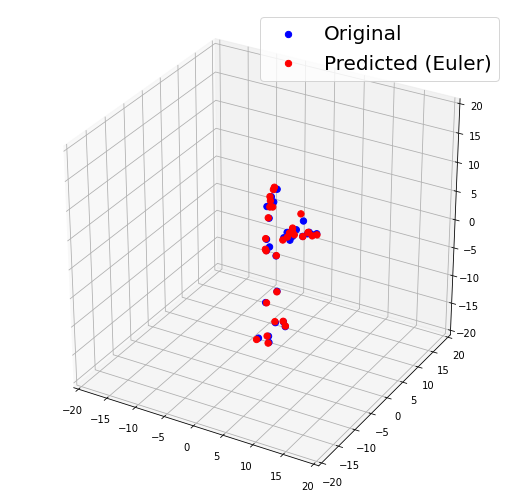

In [ ]:
###QUATERNION, EULER, ROTVEC, ...
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

dir_mot = 'drive/MyDrive/MOTIONS/'
data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []

fig=plt.figure(1, figsize=(9,9))
ax = fig.gca(projection='3d')

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

joint_n = 31


T = []


for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#ax.scatter(T[:,2], T[:,0], T[:,1], c = 'k', alpha = 1 );

k = 461 #index of the frame to plot

xs_or = []
ys_or = []
zs_or = []

xs_p = []
ys_p = []
zs_p = []


#for i in range(0, 3*joint_n, 3):
for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

    if np.linalg.norm(a) != 0:
      a = a / np.linalg.norm(a)

    #retrieving the corresponding position 

    M = np.reshape(x_test[k], [31, 3])

    off = [M[i,0], M[i,1], M[i,2]]

    if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
    if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
    if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
    if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    

    y_pred = np.reshape(predicted[k,i], [3])
    y_real = np.reshape(y_test[k,i], [3])

    #Q = R.from_quat(y_real)
    #Q = R.from_euler('xyz', y_real)
    Q = R.from_rotvec(y_real)
    #B = Q.as_euler('xyz')
    #B = Q.as_rotvec()
    y_real = Q.as_matrix()

    c = np.matmul(y_real, a)
    c = c + off
    xs_or = np.append(xs_or, c[0])
    ys_or = np.append(ys_or, c[1])
    zs_or = np.append(zs_or, c[2])

    #Q = R.from_quat(y_pred)
    #Q = R.from_euler('xyz', y_pred)
    Q = R.from_rotvec(y_pred)
    #B = Q.as_euler('xyz')
    #B = Q.as_rotvec()
    y_pred = Q.as_matrix()

    d = np.matmul(y_pred, a)
    d = d + off
    xs_p = np.append(xs_p, d[0])
    ys_p = np.append(ys_p, d[1])
    zs_p = np.append(zs_p, d[2])


ax.scatter(zs_or-M[0,2], xs_or-M[0,0], ys_or-M[0,1], c = 'b', alpha = 1, s = 40,  label = 'Original')
ax.scatter(zs_p-M[0,2], xs_p-M[0,0], ys_p-M[0,1], c = 'r', alpha = 1, s = 40,  label = 'Predicted (Euler)')
ax.legend(prop={'size': 20})


a = [xs_or, ys_or, zs_or]
a = np.reshape(a, [31, 3])
b = [xs_p, ys_p, zs_p]
b = np.reshape(b, [31, 3])
np.linalg.norm(a-b)

9.239740655142207

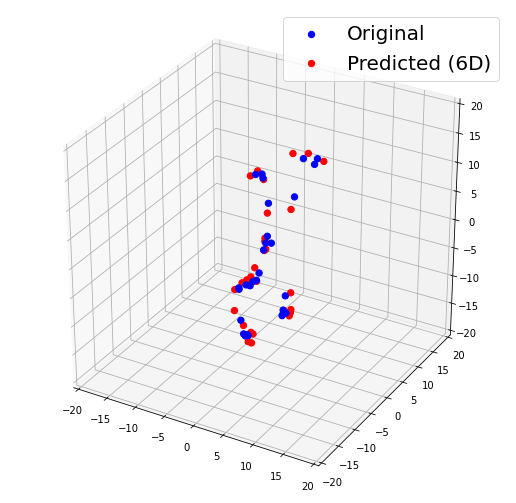

In [ ]:
### 6D ###
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

dir_mot = 'drive/MyDrive/MOTIONS/'
data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []

fig=plt.figure(1, figsize=(9,9))
ax = fig.gca(projection='3d')

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

joint_n = 31


T = []


for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#ax.scatter(T[:,2], T[:,0], T[:,1], c = 'k', alpha = 1 );

k = 2235

xs_or = []
ys_or = []
zs_or = []

xs_p = []
ys_p = []
zs_p = []


#for i in range(0, 3*joint_n, 3):
for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

    if np.linalg.norm(a) != 0:
      a = a / np.linalg.norm(a)

    #retrieving the corresponding position 

    M = np.reshape(x_test[k], [31, 3])

    off = [M[i,0], M[i,1], M[i,2]]

    if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
    if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
    if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
    if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    

    y_pred = np.reshape(predicted[k,i], [3, 3])
    y_real = np.reshape(y_test[k,i], [3, 3])

    c = np.matmul(y_real, a)
    c = c + off
    xs_or = np.append(xs_or, c[0])
    ys_or = np.append(ys_or, c[1])
    zs_or = np.append(zs_or, c[2])

    a1 = y_pred[:,0]
    a2 = y_pred[:,1]

    b1 = a1 / np.linalg.norm(a1)
    b2 = a2 - np.dot(a2,b1)*b1
    b2 = b2 / np.linalg.norm(b2)

    b3 = np.cross(b1, b2)

    #y_pred_n = np.transpose([b1, b2, b3])
    y_pred_n = np.reshape([b1, b2, b3], [3,3])

    d = np.matmul(y_pred_n, a)
    d = d + off
    xs_p = np.append(xs_p, d[0])
    ys_p = np.append(ys_p, d[1])
    zs_p = np.append(zs_p, d[2])


ax.scatter(zs_or-M[0,2], xs_or-M[0,0], ys_or-M[0,1], c = 'b', alpha = 1, s = 40,  label = 'Original')
ax.scatter(zs_p-M[0,2], xs_p-M[0,0], ys_p-M[0,1], c = 'r', alpha = 1, s = 40,  label = 'Predicted (6D)')
ax.legend(prop={'size': 20})


a = [xs_or, ys_or, zs_or]
a = np.reshape(a, [31, 3])
b = [xs_p, ys_p, zs_p]
b = np.reshape(b, [31, 3])
np.linalg.norm(a-b)

In [ ]:
#BIVECTOR

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

xs = []
ys = []
zs = []

fig=plt.figure(1, figsize=(9,9))
ax = fig.gca(projection='3d')

ax.set_xlim([-20, 20])
ax.set_ylim([-20, 20])
ax.set_zlim([-20, 20])

joint_n = 31


T = []


for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

#ax.scatter(T[:,2], T[:,0], T[:,1], c = 'k', alpha = 1 );

k = 3181


xs_or = []
ys_or = []
zs_or = []

xs_p = []
ys_p = []
zs_p = []

for i in range(0, joint_n):
    #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]

    if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

    if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
    if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
    if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

    if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
    
    
    a = a[0]*e1 +  a[1]*e2 +  a[2]*e3

    if norm(a) != 0:
        a = a / norm(a)

    y_pred = np.reshape(predicted[k,i], [3])
    y_real = np.reshape(y_test[k,i], [3])


    B = y_pred[0]*e12 + y_pred[1]*e13 + y_pred[2]*e23
    #Rot_pred = e**(-0.5*B)
    Rot_pred = (1-B)/(1+B) 

    B = y_real[0]*e12 + y_real[1]*e13 + y_real[2]*e23
    #Rot_real = e**(-0.5*B)
    Rot_real = (1-B)/(1+B) 

    M = np.reshape(x_test[k], [31, 3])

    off = [M[i,0], M[i,1], M[i,2]]

    if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
    if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
    if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
    if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    
    off = off[0]*e1 + off[1]*e2 + off[2]*e3

    c = (Rot_pred * a * ~Rot_pred )
    c = c + off
    xs_or = np.append(xs_or, c[1])
    ys_or = np.append(ys_or, c[2])
    zs_or = np.append(zs_or, c[3])

    d = (Rot_real * a * ~Rot_real )
    d = d + off
    xs_p = np.append(xs_p, d[1])
    ys_p = np.append(ys_p, d[2])
    zs_p = np.append(zs_p, d[3])


ax.scatter(zs_or-M[0,2], xs_or-M[0,0], ys_or-M[0,1], c = 'b', alpha = 1, s = 40,  label = 'Original')
ax.scatter(zs_p-M[0,2], xs_p-M[0,0], ys_p-M[0,1], c = 'r', alpha = 1, s = 40,  label = 'Predicted (Bivector - Cayley Transf.)')
ax.legend(prop={'size': 20})

a = [xs_or, ys_or, zs_or]
a = np.reshape(a, [31, 3])
b = [xs_p, ys_p, zs_p]
b = np.reshape(b, [31, 3])
np.linalg.norm(a-b)

# Euclidean Distance

In [ ]:
###MATRIX CASE###
import random
import pandas as pd

dir_mot = 'drive/MyDrive/MOTIONS/'
dir_rot = 'drive/MyDrive/ROTATIONS-NEW/'
joint_n = 31
found = 0
dist = []

te_len = 3300

data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

T = []

xs = []
ys = []
zs = []

for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

for k in range(0,te_len):
    print(k)
    xs_or = []
    ys_or = []
    zs_or = []

    xs_p = []
    ys_p = []
    zs_p = []

    for i in range(0, joint_n):
      #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
      if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

      if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
      if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
      if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

      if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

      if np.linalg.norm(a) != 0:
        a = a / np.linalg.norm(a)
    

      y_pred = np.reshape(predicted[k,i], [3, 3])
      y_real = np.reshape(y_test[k,i], [3, 3])

      M = np.reshape(x_test[k], [31, 3])
      ##############################

      off = [M[i,0], M[i,1], M[i,2]]

      if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
      if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
      if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
      if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    

      c = np.matmul(y_real, a)
      c = c + off
      xs_or = np.append(xs_or, c[0])
      ys_or = np.append(ys_or, c[1])
      zs_or = np.append(zs_or, c[2])

      d = np.matmul(y_pred, a)
      d = d + off
      xs_p = np.append(xs_p, d[0])
      ys_p = np.append(ys_p, d[1])
      zs_p = np.append(zs_p, d[2])
  

    a = [xs_or, ys_or, zs_or]
    a = np.reshape(a, [31, 3])
    b = [xs_p, ys_p, zs_p]
    b = np.reshape(b, [31, 3])
    dist = np.append(dist, np.linalg.norm(a-b))


print(np.max(dist))
print(np.average(dist))
print(np.std(dist))

In [ ]:
###QUATERNION, EULER, ROTVEC CASE###
import random
import pandas as pd

dir_mot = 'drive/MyDrive/MOTIONS/'
dir_rot = 'drive/MyDrive/ROTATIONS-NEW/'
joint_n = 31
found = 0
dist = []

te_len = 3300

data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

T = []

xs = []
ys = []
zs = []
for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

for k in range(0,te_len):
    print(k)
    xs_or = []
    ys_or = []
    zs_or = []

    xs_p = []
    ys_p = []
    zs_p = []

    for i in range(0, joint_n):
      #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
      if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

      if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
      if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
      if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

      if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

      if np.linalg.norm(a) != 0:
        a = a / np.linalg.norm(a)
    

      y_pred = np.reshape(predicted[k,i], [3])
      y_real = np.reshape(y_test[k,i], [3])

      M = np.reshape(x_test[k], [31, 3])
      ##############################

      off = [M[i,0], M[i,1], M[i,2]]

      if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
      if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
      if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
      if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]

      #Q = R.from_quat(y_real)
      #Q = R.from_euler('xyz', y_real)
      Q = R.from_rotvec(y_real)
      #B = Q.as_euler('xyz')
      #B = Q.as_rotvec()
      y_real = Q.as_matrix()

      c = np.matmul(y_real, a)
      c = c + off
      xs_or = np.append(xs_or, c[0])
      ys_or = np.append(ys_or, c[1])
      zs_or = np.append(zs_or, c[2])

      #Q = R.from_quat(y_pred)
      #Q = R.from_euler('xyz', y_pred)
      Q = R.from_rotvec(y_pred)
      #B = Q.as_euler('xyz')
      #B = Q.as_rotvec()
      y_pred = Q.as_matrix()

      d = np.matmul(y_pred, a)
      d = d + off
      xs_p = np.append(xs_p, d[0])
      ys_p = np.append(ys_p, d[1])
      zs_p = np.append(zs_p, d[2])
  

    a = [xs_or, ys_or, zs_or]
    a = np.reshape(a, [31, 3])
    b = [xs_p, ys_p, zs_p]
    b = np.reshape(b, [31, 3])
    dist = np.append(dist, np.linalg.norm(a-b))


print(np.max(dist))
print(np.average(dist))
print(np.std(dist))

In [ ]:
#####6D CASE########
import random

dir_mot = 'drive/MyDrive/MOTIONS/'
dir_rot = 'drive/MyDrive/ROTATIONS-NEW/'
joint_n = 31
found = 0
dist = []

te_len = 3300


for k in range(0,te_len):
    print(k)
    xs_or = []
    ys_or = []
    zs_or = []

    xs_p = []
    ys_p = []
    zs_p = []

    for i in range(0, joint_n):
      #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
      if i != 30:
        a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

      if i == 6 or i == 11:
        a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
      if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
        a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
      if i == 23: #l-thumb connected to l-finger base (index = 21)
        a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

      if i == 30: #r-thumb connected to r-finger base (index = 28)
        a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
        

      if np.linalg.norm(a) != 0:
        a = a / np.linalg.norm(a)
    

      y_pred = np.reshape(predicted[k,i], [3, 3])
      y_real = np.reshape(y_test[k,i], [3, 3])

      M = np.reshape(x_test[k], [31, 3])
      ##############################

      off = [M[i,0], M[i,1], M[i,2]]

      if i == 6 or i == 11:
        off = [M[0,0], M[0,1], M[0,2]]
      if i == 17 or i == 24:
        off = [M[14,0], M[14,1], M[14,2]]
      if i == 23:
        off = [M[21,0], M[21,1], M[21,2]]
      if i == 30:
        off = [M[28,0], M[28,1], M[28,2]]
    

      c = np.matmul(y_real, a)
      c = c + off
      xs_or = np.append(xs_or, c[0])
      ys_or = np.append(ys_or, c[1])
      zs_or = np.append(zs_or, c[2])

      a1 = y_pred[:,0]
      a2 = y_pred[:,1]

      b1 = a1 / np.linalg.norm(a1)
      b2 = a2 - np.dot(a2,b1)*b1
      b2 = b2 / np.linalg.norm(b2)

      b3 = np.cross(b1, b2)

      #y_pred_n = np.transpose([b1, b2, b3])
      y_pred_n = np.reshape([b1, b2, b3], [3,3])

      d = np.matmul(y_pred_n, a)
      d = d + off
      xs_p = np.append(xs_p, d[0])
      ys_p = np.append(ys_p, d[1])
      zs_p = np.append(zs_p, d[2])
  

    a = [xs_or, ys_or, zs_or]
    a = np.reshape(a, [31, 3])
    b = [xs_p, ys_p, zs_p]
    b = np.reshape(b, [31, 3])
    dist = np.append(dist, np.linalg.norm(a-b))


print(np.max(dist))
print(np.average(dist))
print(np.std(dist))

In [ ]:
#BIVECTOR

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
joint_n = 31 

data = pd.read_csv('drive/MyDrive/MOTIONS/motion_T_pose.csv')
T_pose = data.iloc[0,:]

T = []

xs = []
ys = []
zs = []

for i in range(0, 3*joint_n, 3):
    a  = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
    #a = a / np.linalg.norm(a)
    xs = np.append(xs, a[0])
    ys = np.append(ys, a[1])
    zs = np.append(zs, a[2])
    T = np.append(T, a)

T = np.reshape(T, [31, 3])
T = T - T[0]

dist = []
for k in range(0,te_len):

    xs_or = []
    ys_or = []
    zs_or = []

    xs_p = []
    ys_p = []
    zs_p = []

    for i in range(0, joint_n):
        #a = [T_pose.iloc[i], T_pose.iloc[i+1], T_pose.iloc[i+2]]
        if i != 30:
            a = [T[i+1, 0] - T[i,0], T[i+1,1]-T[i,1], T[i+1,2] - T[i,2]]

        if i == 6 or i == 11:
            a = [T[i, 0] - T[0,0], T[i,1]-T[0,1], T[i+1,2] - T[0,2]]
    
        if i ==  17 or i == 24: #r-shoulder and l-shoulder connected to neck (index = 24)    
            a = [T[i, 0] - T[14,0], T[i,1]-T[14,1], T[i,2] - T[14,2]]
    
        if i == 23: #l-thumb connected to l-finger base (index = 21)
            a = [T[i, 0] - T[21,0], T[i,1]-T[21,1], T[i,2] - T[21,2]]

        if i == 30: #r-thumb connected to r-finger base (index = 28)
            a = [T[i, 0] - T[28,0], T[i,1]-T[28,1], T[i,2] - T[28,2]]
    
    
        a = a[0]*e1 +  a[1]*e2 +  a[2]*e3

        if norm(a) != 0:
            a = a / norm(a)

        y_pred = np.reshape(predicted[k,i], [3])
        y_real = np.reshape(y_test[k,i], [3])


        B = y_pred[0]*e12 + y_pred[1]*e13 + y_pred[2]*e23
        Rot_pred = e**(-0.5*B)
        #Rot_pred = (1-B)/(1+B) 

        B = y_real[0]*e12 + y_real[1]*e13 + y_real[2]*e23
        Rot_real = e**(-0.5*B)
        #Rot_real = (1-B)/(1+B) 

        M = np.reshape(x_test[k], [31, 3])

        off = [M[i,0], M[i,1], M[i,2]]

        if i == 6 or i == 11:
            off = [M[0,0], M[0,1], M[0,2]]
        if i == 17 or i == 24:
            off = [M[14,0], M[14,1], M[14,2]]
        if i == 23:
            off = [M[21,0], M[21,1], M[21,2]]
        if i == 30:
            off = [M[28,0], M[28,1], M[28,2]]
    
        off = off[0]*e1 + off[1]*e2 + off[2]*e3

        c = (Rot_pred * a * ~Rot_pred )
        c = c + off
        xs_or = np.append(xs_or, c[1])
        ys_or = np.append(ys_or, c[2])
        zs_or = np.append(zs_or, c[3])

        d = (Rot_real * a * ~Rot_real )
        d = d + off
        xs_p = np.append(xs_p, d[1])
        ys_p = np.append(ys_p, d[2])
        zs_p = np.append(zs_p, d[3])

    #ax.scatter(zs_p, xs_p, ys_p, c = 'g', alpha = 1);
    #ax.scatter(zs_or, xs_or, ys_or, c = 'm', alpha = 1);

    a = [xs_or, ys_or, zs_or]
    a = np.reshape(a, [31, 3])
    b = [xs_p, ys_p, zs_p]
    b = np.reshape(b, [31, 3])
    dist = np.append(dist, np.linalg.norm(a-b))

print(np.max(dist))
print(np.average(dist))
print(np.std(dist))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:93: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: DeprecationWarning: Treating MultiVector objects like a sequence is deprecated. To access the coefficients as a sequence, use the `.value` attribute.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:98: DeprecationWarning: Treating MultiVector objects like a sequence is depreca

9.082473689415563
7.014466325598046
0.6307989453769911


In [ ]:
print(np.where(dist == np.max(dist)))
print(np.where(dist == np.min(dist)))

(array([1851]),)
(array([722]),)
